<a href="https://colab.research.google.com/github/wcj365/apache-spark/blob/master/notebooks/colab-pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Running PySpark 2.4.5 on Colab
1. Install JDK 8
2. Switch JDK from version 11 to 8 (Colab comes with JDK 11)
3. Install PySpark
4. Set Envrionment variable for JAVA_HOME (may not be necessary)
5. Get data

## References
- https://opensource.com/article/19/3/apache-spark-and-dataframes-tutorial

In [3]:
#!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!apt-get install openjdk-8-jdk-headless -qq 

Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u252-b09-1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u252-b09-1~18.04) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u252-b09-1~18.04_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u252-b09-1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u252-b09-1~18.04) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
Setting up openjdk-8-jdk-headless:amd64 (8u252-b0

In [5]:
!update-alternatives --config java

There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [6]:
!java -version

openjdk version "1.8.0_252"
OpenJDK Runtime Environment (build 1.8.0_252-8u252-b09-1~18.04-b09)
OpenJDK 64-Bit Server VM (build 25.252-b09, mixed mode)


In [27]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!java --version

openjdk 11.0.7 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [7]:
!pip install pyspark

     |████████████████████████████████| 217.8MB 60kB/s 
     |████████████████████████████████| 204kB 47.2MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=ba4b97c309ee495d625696747e071a6107d7436ebb7ea0db6e8a0371fd48ffcb
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [8]:
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
!ls

--2020-05-25 00:28:51--  http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.86
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2144903 (2.0M) [application/x-gzip]
Saving to: ‘kddcup.data_10_percent.gz’

kddcup.data_10_perc 100%[===================>]   2.04M  1.88MB/s    in 1.1s    

2020-05-25 00:28:53 (1.88 MB/s) - ‘kddcup.data_10_percent.gz’ saved [2144903/2144903]

kddcup.data_10_percent.gz  sample_data


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql import Row

plt.style.use('fivethirtyeight')
print("ready!")

ready!


In [10]:
spark = SparkSession \
        .builder \
        .appName("Jay Test") \
        .getOrCreate()
        
spark

In [11]:
raw_rdd = spark.sparkContext.textFile("kddcup.data_10_percent.gz").cache()

raw_rdd.take(5)

['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.']

In [12]:
raw_rdd.count()

494021

In [13]:
csv_rdd = raw_rdd.map(lambda row: row.split(","))
len(csv_rdd.take(1)[0])

42

In [14]:
parsed_rdd = csv_rdd.map(lambda r: Row(
    duration=int(r[0]),
    protocol_type=r[1],
    service=r[2],
    flag=r[3],
    src_bytes=int(r[4]),
    dst_bytes=int(r[5]),
    wrong_fragment=int(r[7]),
    urgent=int(r[8]),
    hot=int(r[9]),
    num_failed_logins=int(r[10]),
    num_compromised=int(r[12]),
    su_attempted=r[14],
    num_root=int(r[15]),
    num_file_creations=int(r[16]),
    label=r[-1]
    )
)

parsed_rdd.take(5)

[Row(dst_bytes=5450, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=181, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=486, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=239, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=1337, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=235, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=1337, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=219, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=2032, duration=0, flag

In [15]:
df = parsed_rdd.toDF()
display(df.head(10))

[Row(dst_bytes=5450, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=181, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=486, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=239, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=1337, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=235, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=1337, duration=0, flag='SF', hot=0, label='normal.', num_compromised=0, num_failed_logins=0, num_file_creations=0, num_root=0, protocol_type='tcp', service='http', src_bytes=219, su_attempted='0', urgent=0, wrong_fragment=0),
 Row(dst_bytes=2032, duration=0, flag

In [16]:
df.printSchema()

root
 |-- dst_bytes: long (nullable = true)
 |-- duration: long (nullable = true)
 |-- flag: string (nullable = true)
 |-- hot: long (nullable = true)
 |-- label: string (nullable = true)
 |-- num_compromised: long (nullable = true)
 |-- num_failed_logins: long (nullable = true)
 |-- num_file_creations: long (nullable = true)
 |-- num_root: long (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- src_bytes: long (nullable = true)
 |-- su_attempted: string (nullable = true)
 |-- urgent: long (nullable = true)
 |-- wrong_fragment: long (nullable = true)



In [0]:
df.registerTempTable("connections")

In [18]:
group_df = df.groupBy("protocol_type") \
             .count() \
             .orderBy("count", ascending=True)

print(group_df.toPandas())

  protocol_type   count
0           udp   20354
1           tcp  190065
2          icmp  283602


In [22]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(spark.sparkContext)

protocols = sqlContext.sql("""
                           SELECT protocol_type, count(*) as freq
                           FROM connections
                           GROUP BY protocol_type
                           ORDER BY 2 DESC
                           """)
protocols.toPandas()

,protocol_type,freq
0,icmp,283602
1,tcp,190065
2,udp,20354


In [23]:
labels = sqlContext.sql("""
                           SELECT label, count(*) as freq
                           FROM connections
                           GROUP BY label
                           ORDER BY 2 DESC
                           """)
labels.toPandas()

,label,freq
0,smurf.,280790
1,neptune.,107201
2,normal.,97278
3,back.,2203
4,satan.,1589
5,ipsweep.,1247
6,portsweep.,1040
7,warezclient.,1020
8,teardrop.,979
9,pod.,264


In [0]:
type(labels)

Out[38]: pyspark.sql.dataframe.DataFrame

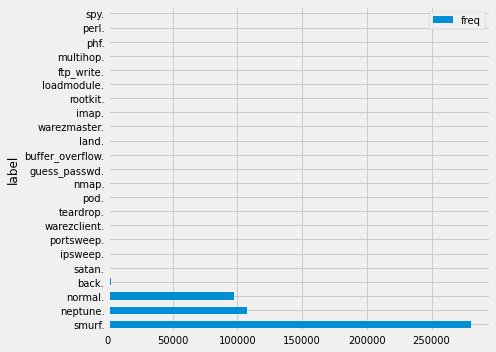

In [25]:
labels_df = labels.toPandas()
labels_df.set_index("label", drop=True,inplace=True)
labels_fig = labels_df.plot(kind='barh')

plt.rcParams["figure.figsize"] = (7, 5)
plt.rcParams.update({'font.size': 10})
plt.tight_layout()